In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/CSS/LDS6_K268_ONLINE_HuynhVinhThang/LDS6_HuynhVinhThang_Cuoi_ky'

/content/gdrive/My Drive/CSS/LDS6_K268_ONLINE_HuynhVinhThang/LDS6_HuynhVinhThang_Cuoi_ky


#Cho dữ liệu ItemList.xlsx
Yêu cầu: Đọc và chuẩn hóa dữ liệu. Sau đó chọn thuật toán thích hợp trong nhóm Association rule learning để tính toán mức độ kết hợp của các item.
  1. Áp dụng thuật toán (tự lựa chọn tham số phù hợp cho thuật toán). In và trực quan hóa kết quả.
  2. Tìm kiếm thông tin từ kết quả: trong thông tin có sausage không. Nếu có thì kết hợp với item nào
  3. Cho biết 15 sản phẩm được mua nhiều nhất. Vẽ biểu đồ
  4. Cho biết 15 sản phẩm được mua ít nhất. Vẽ biểu đồ

#Load Library

In [3]:
import pandas as pd
import numpy as np

%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sys
from collections import defaultdict
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import random

#Load dataset

In [4]:
df = pd.read_excel('ItemList.xlsx', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data have nan value but it's fine, I will take just the value not nan

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14963 entries, 0 to 14962
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       14963 non-null  object
 1   1       14963 non-null  object
 2   2       4883 non-null   object
 3   3       2185 non-null   object
 4   4       795 non-null    object
 5   5       451 non-null    object
 6   6       276 non-null    object
 7   7       196 non-null    object
 8   8       51 non-null     object
 9   9       1 non-null      object
 10  10      1 non-null      object
dtypes: object(11)
memory usage: 1.3+ MB


- The data is unlabelled
- Some model for shopping cart are apriori and eclat. I will try 2 model in this case. For better evaluation

#Attempt 1: Apriori

In [6]:
records = []
for i in range(0, df.shape[0]):
  records.append([str(df.values[i,j]) for j in range(0, df.shape[1])])

In [7]:
records[0]

['sausage',
 'whole milk',
 'semi-finished bread',
 'yogurt',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan',
 'nan']

##Transaction Encoder

In [8]:
te = TransactionEncoder()
te_ary = te.fit(records).transform(records)
df = pd.DataFrame(te_ary, columns= te.columns_)
df.shape

(14963, 168)

In [9]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


The data turn into bool value with the column name as the product name. It will give us the better sight which product can buy with this product.

In [10]:
print(df.columns)

Index(['Instant food products', 'UHT-milk', 'abrasive cleaner',
       'artif. sweetener', 'baby cosmetics', 'bags', 'baking powder',
       'bathroom cleaner', 'beef', 'berries',
       ...
       'turkey', 'vinegar', 'waffles', 'whipped/sour cream', 'whisky',
       'white bread', 'white wine', 'whole milk', 'yogurt', 'zwieback'],
      dtype='object', length=168)


In [11]:
df = df.drop(['nan'], axis = 1)

In [12]:
df.shape

(14963, 167)

##Support

The amount of transaction is quite big so that we must minimize the support, confidence threshold

In [13]:
frequent_itemsets = apriori(df, min_support= 0.008, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.021386,(UHT-milk)
1,0.008087,(baking powder)
2,0.033950,(beef)
3,0.021787,(berries)
4,0.016574,(beverages)


In [14]:
confidence = association_rules(frequent_itemsets, metric= 'confidence', min_threshold=0.02)
confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
2,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729
3,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219
4,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
5,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
6,(yogurt),(other vegetables),0.085879,0.122101,0.008087,0.094163,0.771192,-0.002399,0.969158
7,(other vegetables),(yogurt),0.122101,0.085879,0.008087,0.066229,0.771192,-0.002399,0.978957
8,(rolls/buns),(soda),0.110005,0.097106,0.008087,0.073512,0.757022,-0.002596,0.974533
9,(soda),(rolls/buns),0.097106,0.110005,0.008087,0.083276,0.757022,-0.002596,0.970843


In [15]:
lift = association_rules(frequent_itemsets, metric= 'lift', min_threshold=0.02)
lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
1,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
2,(other vegetables),(soda),0.122101,0.097106,0.009691,0.079365,0.817302,-0.002166,0.980729
3,(soda),(other vegetables),0.097106,0.122101,0.009691,0.099794,0.817302,-0.002166,0.975219
4,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
5,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
6,(yogurt),(other vegetables),0.085879,0.122101,0.008087,0.094163,0.771192,-0.002399,0.969158
7,(other vegetables),(yogurt),0.122101,0.085879,0.008087,0.066229,0.771192,-0.002399,0.978957
8,(rolls/buns),(soda),0.110005,0.097106,0.008087,0.073512,0.757022,-0.002596,0.974533
9,(soda),(rolls/buns),0.097106,0.110005,0.008087,0.083276,0.757022,-0.002596,0.970843


In [16]:
for row in lift.iterrows():
  if 'sausage' in row[1][0]:
    print(row)

(13, antecedents              (sausage)
consequents           (whole milk)
antecedent support       0.0603489
consequent support        0.157923
support                 0.00895542
confidence                0.148394
lift                      0.939663
leverage              -0.000575042
conviction                0.988811
Name: 13, dtype: object)


- The sausage best fit for lift (0.93) and conviction (0.99) which mean this 2 cases will be buy at the same times. But just some times because the lift values approximately 1.

- The rest are (-1;1) range which mean it does not give much information.
Suggession is we need to observe more.

In [17]:
support = lift['support'].values
confidence = lift['confidence'].values
lift = lift['lift'].values

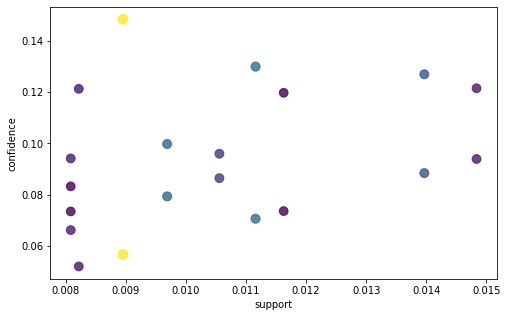

In [18]:
plt.figure(figsize = (8,5))
plt.scatter(support, confidence, s = lift*100, alpha = 0.8, c = lift)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [19]:
result = df.apply(pd.value_counts).fillna(0)
result

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,beverages,bottled beer,bottled water,brandy,brown bread,butter,butter milk,cake bar,candles,candy,canned beer,canned fish,canned fruit,canned vegetables,cat food,cereals,chewing gum,chicken,chocolate,chocolate marshmallow,citrus fruit,cleaner,cling film/bags,cocoa drinks,coffee,condensed milk,cooking chocolate,cookware,cream,cream cheese,...,salt,salty snack,sauces,sausage,seasonal products,semi-finished bread,shopping bags,skin care,sliced cheese,snack products,soap,soda,soft cheese,softener,soups,sparkling wine,specialty bar,specialty cheese,specialty chocolate,specialty fat,specialty vegetables,spices,spread cheese,sugar,sweet spreads,syrup,tea,tidbits,toilet cleaner,tropical fruit,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
False,14903,14643,14941,14934,14960,14959,14842,14946,14455,14637,14715,14285,14055,14925,14400,14436,14700,14871,14897,14748,14261,14848,14942,14881,14786,14921,14783,14546,14610,14903,14168,14932,14889,14947,14490,14865,14948,14946,14951,14609,...,14874,14682,14919,14060,14857,14821,14251,14943,14753,14936,14943,13510,14813,14922,14915,14917,14754,14891,14724,14934,14952,14923,14863,14698,14895,14942,14936,14941,14958,13949,14883,14912,14686,14309,14955,14604,14788,12600,13678,14903
True,60,320,22,29,3,4,121,17,508,326,248,678,908,38,563,527,263,92,66,215,702,115,21,82,177,42,180,417,353,60,795,31,74,16,473,98,15,17,12,354,...,89,281,44,903,106,142,712,20,210,27,20,1453,150,41,48,46,209,72,239,29,11,40,100,265,68,21,27,22,5,1014,80,51,277,654,8,359,175,2363,1285,60


In [20]:
buyed_data = result.iloc[1,:]
buyed_data = buyed_data.sort_values(ascending = False)
best_buyed = buyed_data[:10]
pos = np.arange(len(best_buyed.values))

In [21]:
buyed_data = buyed_data.sort_values(ascending = True)
least_buyed = buyed_data[:10]
pos_least = np.arange(len(least_buyed.values))

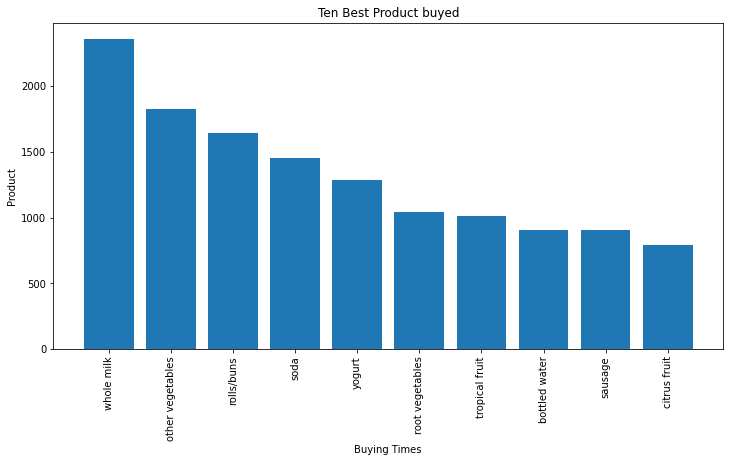

In [22]:
plt.figure(figsize = (12,6))
plt.bar(pos, best_buyed.values, align = 'center')
plt.xticks(pos, best_buyed.keys(), rotation = 'vertical')
plt.xlabel('Buying Times')
plt.ylabel('Product')
plt.title('Ten Best Product buyed')
plt.show()

This plot showed the best 10 product buyed, looks like customer always buy "Essential products" such as milk, vegetables, water, fruit and ofcourse sausage...

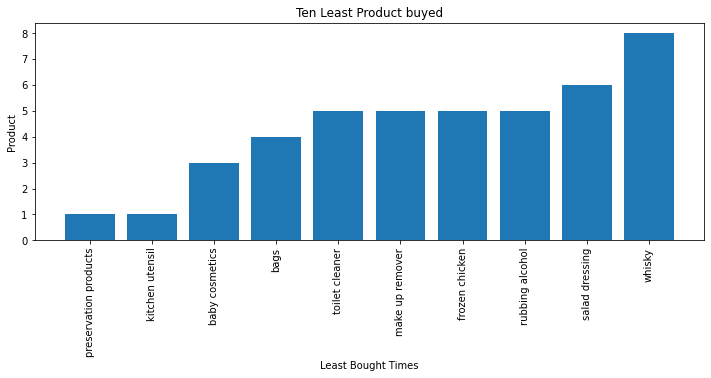

In [23]:
plt.figure(figsize = (12,4))
plt.bar(pos_least, least_buyed.values, align = 'center')
plt.xticks(pos_least, least_buyed.keys(), rotation = 'vertical')
plt.xlabel('Least Bought Times')
plt.ylabel('Product')
plt.title('Ten Least Product buyed')
plt.show()

The least 10 products buyed are preservation product (maybe customer do not like), kitchen utensil - toilet clearner - bags (long life products no need to change frequently), etc

#Attempt 2: ECLAT

In [24]:
def tidlists(transactions):
    tl = defaultdict(set)
    for tid, t in enumerate(transactions):
        for item in t:
            tl[item].add(tid)
    return list(tl.items())
 
class IntersectAll:
    def __and__(self, other):
        return other
IntersectAll = IntersectAll()
 
def eclat(items, minsup=0, minlen=1):
    frequent_itemsets = {(): IntersectAll}
    def recurse(items, prefix):
        while len(items) > 0:
            item, item_tidlist = items.pop()
            l = prefix + (item,)  # l is the (ordered) tuple of items we are looking for
            new_tidlist = frequent_itemsets[prefix] & item_tidlist
            if len(new_tidlist) >= minsup:  # add frequent_itemsets to the new frequent_itemsets
                frequent_itemsets[l] = new_tidlist
             
            # define the new l-conditional database
            new_items = []
            for new_item, _item_tidlist in items:
                new_item_tidlist = _item_tidlist & item_tidlist
                if len(new_item_tidlist) >= minsup:
                    new_items.append((new_item, new_item_tidlist))
             
            # recurse, with l as prefix
            recurse(new_items, l)
     
    recurse(items.copy(), ())
    return {k: len(v) for k, v in frequent_itemsets.items() if len(k) >= minlen}

In [25]:
df1 = pd.read_excel('ItemList.xlsx', header=None)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10
0,sausage,whole milk,semi-finished bread,yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,whole milk,pastry,salty snack,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,canned beer,misc. beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,sausage,hygiene articles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,soda,pickled vegetables,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
records_eclat = []
for i in range(0, df1.shape[0]):
  records_eclat.append([str(df1.values[i,j]) for j in range(0, df1.shape[1])])

In [27]:
tl = tidlists(records_eclat)
tl[0][0]

'sausage'

In [28]:
for i in range(len(tl)-1):
  if tl[i][0] == 'nan':
    print(i)
    del tl[i]

4


In [29]:
result_eclat = eclat(tl, minsup = 20, minlen = 1)

In [30]:
#The first 10 elements
list(result_eclat.items())[:10]

[(('soap',), 20),
 (('nuts/prunes',), 33),
 (('potato products',), 23),
 (('tidbits',), 22),
 (('organic sausage',), 22),
 (('frozen dessert',), 92),
 (('abrasive cleaner',), 22),
 (('canned fruit',), 21),
 (('syrup',), 21),
 (('cleaner',), 31)]

In [31]:
sorted_d = sorted((value, key) for (value, key) in result_eclat.items())
sorted_d[:10]

[(('Instant food products',), 60),
 (('UHT-milk',), 320),
 (('UHT-milk', 'other vegetables'), 32),
 (('UHT-milk', 'rolls/buns'), 27),
 (('UHT-milk', 'tropical fruit'), 23),
 (('UHT-milk', 'whole milk'), 38),
 (('abrasive cleaner',), 22),
 (('artif. sweetener',), 29),
 (('baking powder',), 121),
 (('beef',), 508)]

In [32]:
sorted_d[len(sorted_d)-10:]

[(('white bread', 'soda'), 23),
 (('white bread', 'whole milk'), 47),
 (('white wine',), 175),
 (('whole milk',), 2363),
 (('whole milk', 'sausage'), 134),
 (('yogurt',), 1285),
 (('yogurt', 'sausage'), 86),
 (('yogurt', 'whole milk'), 167),
 (('yogurt', 'whole milk', 'sausage'), 22),
 (('zwieback',), 60)]

In [33]:
for k,v in result_eclat.items():
  if 'sausage' in k:
    print(k, ':', v)

('pork', 'sausage') : 23
('beverages', 'sausage') : 23
('fruit/vegetable juice', 'sausage') : 27
('brown bread', 'sausage') : 27
('coffee', 'sausage') : 20
('newspapers', 'sausage') : 27
('domestic eggs', 'sausage') : 27
('dessert', 'sausage') : 22
('bottled beer', 'sausage') : 50
('bottled water', 'sausage') : 47
('margarine', 'sausage') : 28
('shopping bags', 'sausage') : 29
('chocolate', 'sausage') : 21
('pip fruit', 'sausage') : 32
('root vegetables', 'sausage') : 50
('tropical fruit', 'sausage') : 46
('butter', 'sausage') : 29
('other vegetables', 'sausage') : 90
('frozen vegetables', 'sausage') : 31
('whipped/sour cream', 'sausage') : 32
('white bread', 'sausage') : 21
('rolls/buns', 'sausage') : 80
('curd', 'sausage') : 44
('frankfurter', 'sausage') : 22
('soda', 'sausage') : 89
('canned beer', 'sausage') : 37
('pastry', 'sausage') : 48
('yogurt', 'whole milk', 'sausage') : 22
('yogurt', 'sausage') : 86
('whole milk', 'sausage') : 134
('sausage',) : 903


- The sausage in this model give us more information about the sausage. The are many product are buyed with sausage.
- Some best fit pproduct buyed with sausage are: milk (134), other vegetables (90 - for making salad), rolls/buns (80), etc

In [34]:
keys = result_eclat.values()
titles = result_eclat.keys()
list_titles = []
for item in titles:
  list_titles.append(','.join(item))

In [35]:
result_eclat = pd.DataFrame([list_titles, keys])

In [36]:
key = pd.DataFrame(keys, columns = ['support'])
title = pd.DataFrame(list_titles, columns = ['product'])

In [37]:
result_eclat = pd.concat([title, key], axis = 1)

In [38]:
result_eclat.head()

,product,support
0,soap,20
1,nuts/prunes,33
2,potato products,23
3,tidbits,22
4,organic sausage,22


In [39]:
#Top 10 best buy product
best_product =result_eclat.sort_values(by = 'support', ascending = False)[:10]

In [40]:
#Top 10 least buy product
least_product = result_eclat.sort_values(by = 'support', ascending = True)[:10]

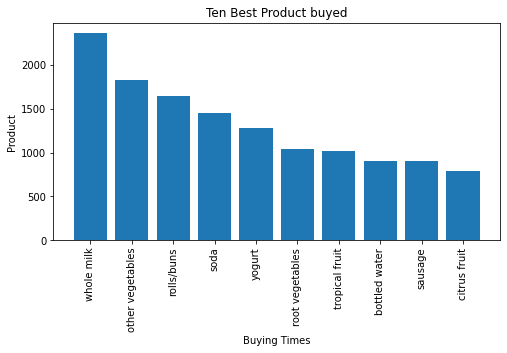

In [41]:
plt.figure(figsize = (8,4))
plt.bar(best_product['product'], best_product['support'],  align = 'center')
plt.xticks(best_product['product'], rotation = 'vertical')
plt.xlabel('Buying Times')
plt.ylabel('Product')
plt.title('Ten Best Product buyed')
plt.show()

- This slow showed us the same like apriori model
- The milk is still the best buyed product, next is vegetables, rolls/buns, soda, etc

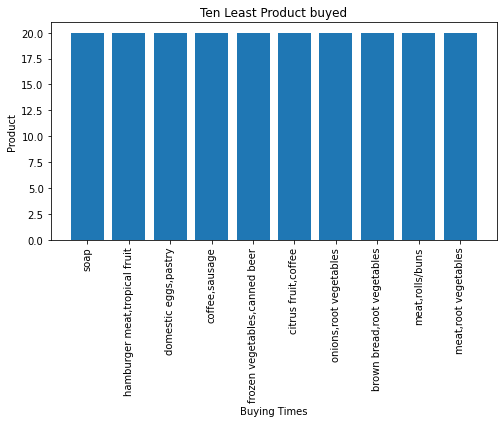

In [42]:
plt.figure(figsize = (8,4))
plt.bar(least_product['product'], least_product['support'],  align = 'center')
plt.xticks(least_product['product'], rotation = 'vertical')
plt.xlabel('Buying Times')
plt.ylabel('Product')
plt.title('Ten Least Product buyed')
plt.show()

- But in this plot, it's totaly different from apriori's plot, which bonus some of the products can not buy with each other.
- Single product: soap
- Combine cart/product:  hamburger-meat-fruit; coffee-sausage; frozen vegetables - canned beer, etc.

###In conclusion, I will choose ECLAT model althought the running time quite slow because the TID-set very long, but it showed me a lot of information if the store need to change their business strategy.